In [1]:
from typing import List


def get_stats(array: List[int]):
    return np.mean(array).round(7), np.std(array).round(7)

def get_interval(array: List[int]):
    z = 1.96
    mean = np.mean(array)
    std = np.std(array)
    return (float(round(mean - z * std / (len(array)** 0.5), 7)), 
            float(round(mean + z * std / (len(array)** 0.5), 7)))



### Генерация с помощью библиотеки random

In [2]:
import random
import time
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [3]:
start_time = time.time()
sample_10k = [random.gauss(0, 1) for _ in range(10000)]
sample_100k = [random.gauss(0, 1) for _ in range(100000)]
end_time = time.time()
print('Статистика для 10000: среднее - {}, дисперсия - {}'.format(*get_stats(sample_10k)))
print(f'Доверительный интервал для матожидания: {get_interval(sample_10k)}')
print()
print('Статистика для 100000: среднее - {}, дисперсия - {}'.format(*get_stats(sample_100k)))
print(f'Доверительный интервал для матожидания: {get_interval(sample_100k)}')
print()
elapsed_time = end_time - start_time
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Статистика для 10000: среднее - -0.0054167, дисперсия - 1.0063964
Доверительный интервал для матожидания: (-0.0251421, 0.0143086)

Статистика для 100000: среднее - -0.0052036, дисперсия - 0.9957554
Доверительный интервал для матожидания: (-0.0113754, 0.0009681)

Время выполнения: 0.0702 секунд


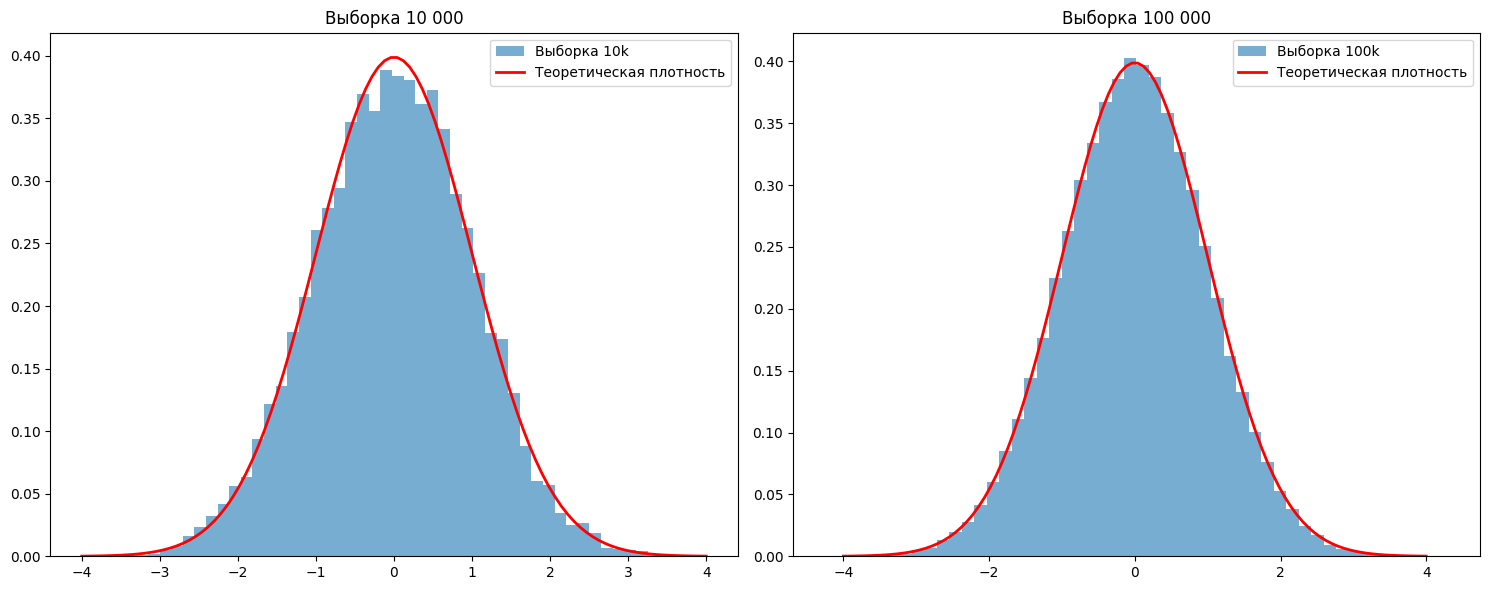

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.hist(sample_10k, bins=50, density=True, alpha=0.6, label='Выборка 10k ')
x = np.linspace(-4, 4, 100)
ax1.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Теоретическая плотность')
ax1.set_title('Выборка 10 000')
ax1.legend()

ax2.hist(sample_100k, bins=50, density=True, alpha=0.6, label='Выборка 100k')
ax2.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Теоретическая плотность')
ax2.set_title('Выборка 100 000')
ax2.legend()

plt.tight_layout()
plt.show()


In [5]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_10k = [random.randint(0, 1) for _ in range(10000)]
    mean0 += seq_10k.count(0)
    mean1 += seq_10k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 4998.402
Среднее количество 1 в выборке: 5001.598
Время выполнения: 8.3541 секунд


In [133]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_100k = [random.randint(0, 1) for _ in range(50000)]
    mean0 += seq_100k.count(0)
    mean1 += seq_100k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 25002.549
Среднее количество 1 в выборке: 24997.451
Время выполнения: 43.2917 секунд


### Генерация с помощью numpy.random

In [15]:
start_time = time.time()
numbers_10k = np.random.normal(0, 1, 10000)
numbers_100k = np.random.normal(0, 1, 100000)
end_time = time.time()
print('Статистика для 10000: среднее - {}, дисперсия - {}'.format(*get_stats(numbers_10k)))
print(f'Доверительный интервал для матожидания: {get_interval(numbers_10k)}')
print()
print('Статистика для 100000: среднее - {}, дисперсия - {}'.format(*get_stats(numbers_100k)))
print(f'Доверительный интервал для матожидания: {get_interval(numbers_100k)}')
print()
elapsed_time = end_time - start_time
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Статистика для 10000: среднее - 0.0079182, дисперсия - 0.9987276
Доверительный интервал для матожидания: (-0.0116569, 0.0274932)

Статистика для 100000: среднее - 0.0009364, дисперсия - 0.9991377
Доверительный интервал для матожидания: (-0.0052563, 0.0071291)

Время выполнения: 0.0056 секунд


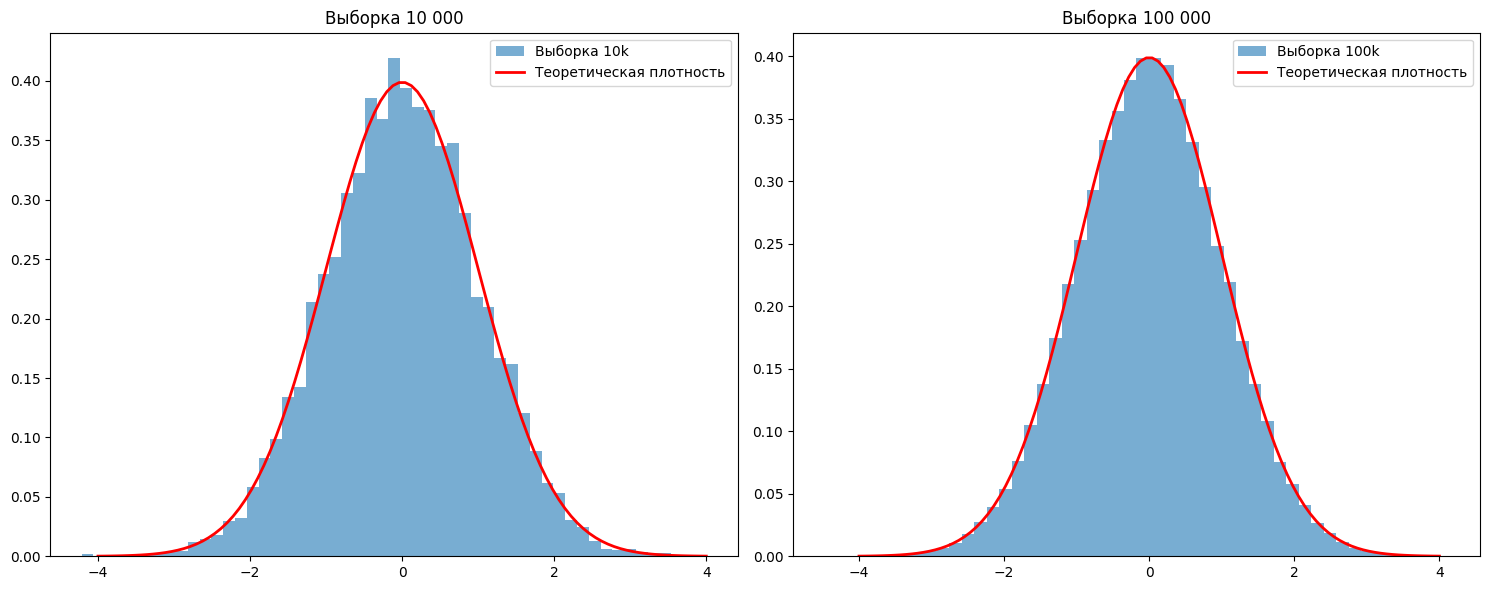

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.hist(numbers_10k, bins=50, density=True, alpha=0.6, label='Выборка 10k ')
x = np.linspace(-4, 4, 100)
ax1.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Теоретическая плотность')
ax1.set_title('Выборка 10 000')
ax1.legend()

ax2.hist(numbers_100k, bins=50, density=True, alpha=0.6, label='Выборка 100k')
ax2.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label='Теоретическая плотность')
ax2.set_title('Выборка 100 000')
ax2.legend()

plt.tight_layout()
plt.show()

In [119]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_10k = np.random.randint(0, 2, 10000).tolist()
    mean0 += seq_10k.count(0)
    mean1 += seq_10k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 5001.406
Среднее количество 1 в выборке: 4998.594
Время выполнения: 0.3965 секунд


In [134]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_100k = np.random.randint(0, 2, 50000).tolist()
    mean0 += seq_100k.count(0)
    mean1 += seq_100k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 25004.625
Среднее количество 1 в выборке: 24995.375
Время выполнения: 2.0984 секунд


### Генерация с помощью os.urandom

In [57]:
import os

def generate_bit():
    random_byte = os.urandom(1)
    random_int = int.from_bytes(random_byte, 'big')
    return random_int & 1 

[1, 0, 1, 0, 1, 0, 0, 1, 0, 0]


In [138]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_10k = [generate_bit() for i in range(10000)]
    mean0 += seq_10k.count(0)
    mean1 += seq_10k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 5002.204
Среднее количество 1 в выборке: 4997.796
Время выполнения: 7.7711 секунд


In [139]:
start_time = time.time()
mean0 = 0
mean1 = 0
for i in range(1000):
    seq_10k = [generate_bit() for _ in range(50000)]
    mean0 += seq_10k.count(0)
    mean1 += seq_10k.count(1)
end_time = time.time()
elapsed_time = end_time - start_time
print("Среднее количество 0 в выборке:", mean0 / 1000)
print("Среднее количество 1 в выборке:", mean1 / 1000)
print(f"Время выполнения: {elapsed_time:.4f} секунд")

Среднее количество 0 в выборке: 25003.936
Среднее количество 1 в выборке: 24996.064
Время выполнения: 37.9939 секунд
